In [7]:
!pip install tensorflow==1.6.0 --no-deps

In [8]:
!pip install keras==2.1.5 --no-deps

  Using cached https://files.pythonhosted.org/packages/ba/65/e4aff762b8696ec0626a6654b1e73b396fcc8b7cc6b98d78a1bc53b85b48/Keras-2.1.5-py2.py3-none-any.whl
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [12]:
!pip install keras --upgrade

     |████████████████████████████████| 378kB 9.4MB/s 
  Found existing installation: Keras 2.1.5
    Uninstalling Keras-2.1.5:
      Successfully uninstalled Keras-2.1.5


In [1]:
cd /content/drive/My Drive/google_colab_gpu/GSOC 2020/Trials

/content/drive/My Drive/google_colab_gpu/GSOC 2020/Trials


In [2]:
import numpy as np
import tensorflow as tf
import keras

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or 

In [3]:
print(tf.__version__)
print(keras.__version__)

1.6.0
2.1.5


In [0]:
from keras.datasets import mnist
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)

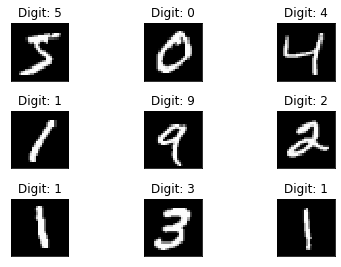

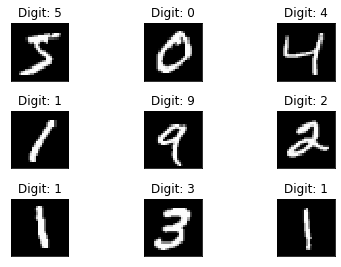

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [21]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
img_rows=X_train.shape[1]
img_cols=X_train.shape[2]

In [23]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
from keras import backend as k
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)


In [0]:
import keras
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

In [25]:
X_test.shape,y_test.shape

((10000, 28, 28, 1), (10000, 10))

In [0]:
from google.colab.patches import cv2_imshow
import cv2

In [28]:
idx=1
cv2_imshow(X_test[idx]*255)
print(list(y_test[idx]).index(1))
del(idx)

2


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [0]:
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [33]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.2592 - acc: 0.9202 - val_loss: 0.0635 - val_acc: 0.9796
Epoch 2/10
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0843 - acc: 0.9744 - val_loss: 0.0402 - val_acc: 0.9859
Epoch 3/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0620 - acc: 0.9819 - val_loss: 0.0341 - val_acc: 0.9881
Epoch 4/10
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0541 - acc: 0.9835 - val_loss: 0.0302 - val_acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0450 - acc: 0.9862 - val_loss: 0.0330 - val_acc: 0.9896
Epoch 6/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0417 - acc: 0.9878 - val_loss: 0.0269 - val_acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0355 - acc: 0.9895 - val_loss: 0.0284 - 

In [34]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

Test loss: 0.026610340551812987
Test accuracy: 0.9909


KeyError: ignored

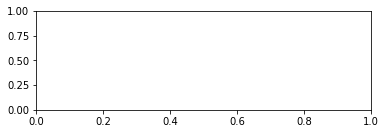

In [35]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

In [36]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit_1.6.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit_1.6.h5")
print("Saved model to disk")

Saved model to disk


#Inference of the Model Trained above.

In [0]:
import numpy as np
X_test=np.zeros((10,28,28,1))
for i in range(0,10):
  X_test[i,:,:,0]=np.loadtxt("data/imgs_csv/input_data"+str(i)+".csv", delimiter=",")
y_test=np.loadtxt("data/ground_truth.csv",delimiter=',')

In [5]:
idx=1
cv2_imshow(X_test[idx]*255)
print(list(y_test[idx]).index(1))
del(idx)

2


In [6]:
print(tf.__version__)
print(keras.__version__)

1.6.0
2.1.5


In [7]:
#import tensorflow.compat.v1 as tf
from keras.models import load_model,model_from_json
from keras import backend as K
#import tensorflow as tf
#tf.compat.v1.disable_eager_execution()
#sess1=K.get_session()
# load json and create model
json_file = open('model_digit_1.6.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model_digit_1.6.h5")
#sess2=K.get_session()
print("Loaded model from disk")

Loaded model from disk


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [0]:
conv2d_1_weights=model.get_weights()[0].copy()
conv2d_1_bias=model.get_weights()[1].copy()
conv2d_2_weights=model.get_weights()[2].copy()
conv2d_2_bias=model.get_weights()[3].copy()
dense_1_weights=model.get_weights()[4].copy()
dense_1_bias=model.get_weights()[5].copy()
dense_2_weights=model.get_weights()[6].copy()
dense_2_bias=model.get_weights()[7].copy()

In [0]:
with tf.Session() as sess:
  input1 = tf.placeholder(tf.float32, [None, 28, 28, 1], name="x")
  
  conv2d_1_weights_tf=tf.constant(conv2d_1_weights)
  conv2d_1_bias_tf=tf.constant(conv2d_1_bias)
  conv2d_2_weights_tf=tf.constant(conv2d_2_weights)
  conv2d_2_bias_tf=tf.constant(conv2d_2_bias)
  dense_1_weights_tf=tf.constant(dense_1_weights)
  dense_1_bias_tf=tf.constant(dense_1_bias)
  dense_2_weights_tf=tf.constant(dense_2_weights)
  dense_2_bias_tf=tf.constant(dense_2_bias)

  conv2d_1_out=tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(input1,conv2d_1_weights_tf,padding="VALID", name="conv2d_layer1",strides=[1,1,1,1]),conv2d_1_bias_tf), name="conv2d_1_out")
  conv2d_2_out=tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(conv2d_1_out,conv2d_2_weights_tf,padding="VALID", name="conv2d_layer2",strides=[1,1,1,1]),conv2d_2_bias_tf), name="conv2d_2_out")
  maxpool_1_out=tf.nn.max_pool(conv2d_2_out,ksize=[1,2,2,1],padding="VALID",strides=[1,2,2,1])
  #tf.print(tf.shape(maxpool_1_out))
  flatten_1_out=tf.layers.flatten(maxpool_1_out)
  #tf.print(tf.shape(flatten_1_out))
  dense_1_out=tf.nn.relu(tf.nn.bias_add(tf.matmul(flatten_1_out,dense_1_weights_tf),dense_1_bias_tf),name="dense_1_out")
  dense_2_out=tf.nn.softmax(tf.nn.bias_add(tf.matmul(dense_1_out,dense_2_weights_tf),dense_2_bias_tf),name="dense_2_out")
  #label_out=(sess.run(dense_2_out,feed_dict={input1:X_test[0:1]}))
  tf.train.write_graph(sess.graph_def,
                      './graph_pb',
                     'tf_1_graph.pb', as_text=False)

In [0]:
def load_pb(path_to_pb):
    with tf.gfile.GFile(path_to_pb, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name='')
        return graph

In [0]:
graph=load_pb('graph_pb/tf_1_graph.pb')

In [0]:
inputs = graph.get_tensor_by_name('x:0')
output=graph.get_tensor_by_name('dense_2_out:0')

In [0]:
with tf.Session(graph=graph) as sess:
  
  #sess.run(tf.global_variables_initializer())
  label_out=sess.run("dense_2_out:0", feed_dict={"x:0":X_test[1:5]})

In [16]:
label_out,y_test[1:5]

(array([[1.78634025e-07, 1.02056601e-05, 9.99989510e-01, 3.73798242e-10,
         1.36962192e-10, 1.89493157e-10, 9.07498148e-08, 7.18134496e-10,
         1.97710803e-09, 4.70260809e-12],
        [1.71843084e-07, 9.99991298e-01, 6.82346524e-07, 1.89406233e-08,
         5.03255296e-06, 4.37334393e-07, 4.01547993e-07, 1.46652565e-06,
         4.40517766e-07, 2.46858036e-08],
        [9.99996662e-01, 4.10658636e-08, 1.04139829e-07, 1.57771964e-08,
         6.88726365e-09, 2.85207213e-09, 2.75323782e-06, 2.18176041e-07,
         1.10599245e-07, 1.29808214e-07],
        [4.90862351e-10, 6.47371667e-09, 4.25922325e-10, 4.07954712e-11,
         9.99991417e-01, 1.00478370e-09, 4.40365744e-09, 4.07812761e-09,
         7.45364326e-10, 8.60614182e-06]], dtype=float32),
 array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]))